# Multi Layer Perceptron

Các hệ số thành phần của mô hình:
- $\mathbf{W}^{(l)} \in \mathbb{R}^{d^{(l - 1)} \times d^{(l)}}$: ma trận trong số tại layer thứ  $l$  ($l = 1, 2,..., L$), coi layer input là layer thứ 0. 
  Trong đó: 
    + $w_{ij}$ là từ node thứ $i$ của laryer $l - 1$ đến node thứ $j$ của layer $l$.
    + $d^{(l)}$: số node của layer thứ $l$ không tính node bias.
- $\mathbf{b}^{(l)} \in \mathbb{R}^{d(l)}$: biases của layer thứ l
- $\mathbf{a}^{(l)} \in \mathbb{R}^{d(l)}$: output của layer thứ l
- $f()$: là một (nonlinear) activation function

<img src="img/mlp_notation.png" alt="drawing" width='50%'/>

## Backpropagation 
Đây là phương pháp sử dụng để tối ưu MLP sử dụng gradient descent.   
Gồm 2 phần:
- Forward propagation:
    + Dữ liệu truyền từ input layer -> output layer -> Tính các giá trị $a, z,..$
    + Tính sau số đầu ra thực tế

- Backpropagation:
    + Được sử dụng để điều chỉnh các trọng số trong mạng
    + Tính gradient ngược từ lớp cuối đến lớp đầu tiên

1. Forward propagation  
- Cần tính predict output $\hat{\mathbf{y}}$ cho mỗi input  
$$
\begin{align*}
    \mathbf{a}^{(0)} &= \mathbf{x}, \\
    z_j^{(l)} &= \mathbf{w}_j^{(l) T} \mathbf{a}^{(l - 1)} + b_j^{(l)}, \\
    \mathbf{z}^{(l)} &= \mathbf{W}^{(l)} \mathbf{a}^{(l - 1)} + \mathbf{b}^{(l)}, \\
    \mathbf{a}^{(l)} &= f(\mathbf{z}^{(l)}), \\
    \hat{\mathbf{y}} &= \mathbf{a}^{(L)}
\end{align*}
$$

2. Backpropagation

Để áp dụng GD cần tính được đạo hàm của $\mathbf{W}^{(l)}, \mathbf{b}^{(l)}$.  
Gọi $J(\mathbf{W, b, X, Y})$ là hàm mất mát. Cần tính: $\frac{\partial J}{\partial \mathbf{W}^{(l)}}$ và $\frac{\partial J}{\partial \mathbf{b}^{(l)}}$  

Khi đó các giá trị đạo hàm là:  
$$
\begin{align*}
\frac{\partial J}{\partial w_{ij}^{(l)}} &= \frac{\partial J}{\partial z_j^{(l)}} \frac{\partial z_j^{(l)}}{\partial w_{ij}^{(l)}} \\
&= e_j ^ {(l)} a_i^{(l-1)}
\end{align*}
$$ 
với 
$$ 
\begin{align*}
e_j ^ {(l)} &=  \frac{\partial J}{\partial z_j^{(l)}} \\
            &= \frac{\partial J}{\partial a_j^{(l)}} \frac{\partial a_j^{(l)}}{\partial z_j^{(l)}} \\
            &= (\sum_{k = 1}^{d^{(l + 1)}} \frac{\partial J}{\partial z_k^{(l + 1)}} \frac{\partial z_k^{(l + 1)}}{\partial a_j^{(l)}}) f'(z_j ^{(l)}) \\
            &= (\sum_{k = 1}^{d^{(l + 1)}} e_j^{(l + 1)} w_{jk}^{(l + 1)}) f'(z_j^{(l)}) \\
            &= (\mathbf{w}_{j:}^{(l + 1)} \mathbf{e}^{(l + 1)}) f'(z_j^{(l)}) \ \  \ \ \ \ \ l = L-1, L-2, ... 1
\end{align*}
$$
Trong đó: $\mathbf{w}_{j:}$ là lấy hàng j của ma trận $W$   
Tương tự có:  $$ \frac{\partial J}{\partial b_j ^{(l)}} = e_j^{(l)}$$
Tại output layer :  
$$
\begin{align*}
\frac{\partial J}{\partial w_{ij}^{(L)}} &= \frac{\partial J}{\partial z_j^{(L)}} \frac{\partial z_j^{(L)}}{\partial w_{ij}^{(L)}}\\
&= e_j ^ {(L)} a_i^{(L-1)} \\
 \frac{\partial J}{\partial b_j ^{(L)}} &= e_j^{(L)} \\
 \mathbf{e}^{(L)} &= \frac{\partial J}{\partial \mathbf{z}^{(L)}}
\end{align*}
$$


## Ví dụ

Ví dụ sử dụng activation function J là max(x, 0), 1 lớp ẩn  
Sử dụng hàm softmax() để tính xác suất dự đoán
=> tính các đạo hàm cần thiết

**feedforwark**
$$
\begin{align*}
\mathbf{Z}^{(1)} &= \mathbf{W}^{(1)T} \mathbf{X} \\
\mathbf{A}^{(1)} &= \max(\mathbf{Z}^{(1)}, 0) \\
\mathbf{Z}^{(2)} &= \mathbf{W}^{(2)T} \mathbf{A}^{(1)} \\
\mathbf{ \hat Y} &= \mathbf{A}^{(2)} = \text{softmax}(\mathbf{Z}^{(2)})
\end{align*}
$$

loss function $J = -\frac{1}{N} \sum_{i = 1}^{N} \sum_{j = 1}^{C} y_{ji} \log{\hat{y}_{ji}}$

**Backpropagation**
$$
\begin{align*}
    \mathbf{E}^{(2)} &= \frac{\partial \mathbf{J}}{\partial \mathbf{Z}^{(2)}} = \frac{1}{N} (\hat{\mathbf{Y}} - \mathbf{Y})
\end{align*}
$$

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [33]:
def softmax(z):
    e_z = np.exp(z - np.max(z, axis=0, keepdims=True)) #Trừ đi max để tránh tràn hàm exp 
    return e_z/e_z.sum(axis = 0)  # vector

In [34]:
# one-hot
from scipy import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

In [35]:
# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

In [46]:
#Sử dụng phương pháp Stochastic Gradient Descent

class MLP_SGD:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.W1 = np.random.randn( input_dim, hidden_dim) * 0.01
        self.b1 = np.zeros((hidden_dim, 1))
        
        self.W2 = np.random.randn(hidden_dim, output_dim) * 0.01
        self.b2 = np.zeros((output_dim, 1))
        
    def forward(self, X):
        self.Z1 = np.dot(self.W1.T, X) + self.b1
        self.A1 = np.maximum(self.Z1, 0) # activation ReLU

        self.Z2 = np.dot(self.W2.T, self.A1) + self.b2
        self.A2 = softmax(self.Z2)
        return self.A2

    def backward(self,x, Yhat, y_true, learning_rate):
        E2 = Yhat - y_true
        dW2 = np.dot(self.A1, E2.T)
        db2 = np.sum(E2, axis=1, keepdims=True)
        E1 = np.dot(self.W2, E2)
        E1[self.Z1 <= 0] = 0  # gradient of ReLU
        dW1 = np.dot(x, E1.T)
        db1 = np.sum(E1, axis=1, keepdims=True)
    
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, learning_rate, epochs):
        m = X.shape[1]
        dim = X.shape[0]
        num_class = len(np.unique(y))
        Y = convert_labels(y, num_class)
        for epoch in range(epochs):
            # Sử dụng SGD
            total_loss = 0
            mix_id = np.random.permutation(m)
            for i in mix_id:
                X_sample = X[:, i].reshape(dim, 1)
                y_sample = Y[:, i].reshape(num_class, 1)

                y_pred = self.forward(X_sample)
                total_loss += cost(y_sample, y_pred)
                self.backward(X_sample, y_pred, y_sample, learning_rate)
            
            if epoch % 100 == 0:
                print(f'Epoch {epoch}: Loss {total_loss/m}')
            if(total_loss / m < 0.02):
                return
                
    def accuracy(self, X, y):
        Z1 = np.dot(self.W1.T, X) + self.b1
        A1 = np.maximum(Z1, 0)
        Z2 = np.dot(self.W2.T, A1) + self.b2
        predicted_class = np.argmax(Z2, axis=0)
        print('training accuracy: %.2f %%' % (100*np.mean(predicted_class == y)))

In [37]:
N = 200
num_class = 3
dim = 2 # số chiều dữ liệu
X = np.zeros((dim, N * num_class))
y = np.zeros(N*num_class, dtype='uint8')

for j in range(num_class):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N)
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N) * 0.2
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j

In [38]:
X.shape

(2, 600)

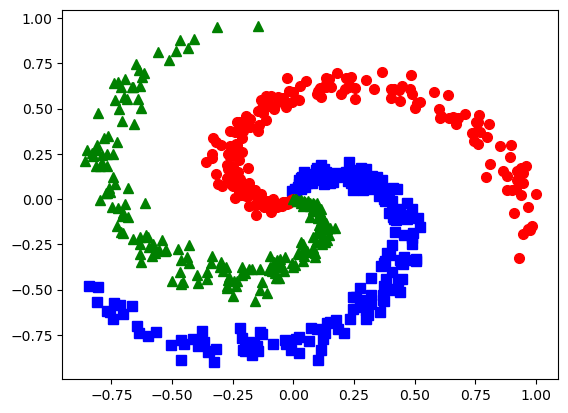

In [39]:
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7)
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7)
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7)

In [47]:
input_dim = dim
hidden_dim = 100 # số hidden units 
output_dim = num_class
learning_rate = 0.01
epochs = 10000

model = MLP_SGD(input_dim, hidden_dim, output_dim)
model.train(X, y, learning_rate, epochs)

Epoch 0: Loss 1.10021541999481
Epoch 100: Loss 0.2125374837736854
Epoch 200: Loss 0.09618392333596082
Epoch 300: Loss 0.058533352959175305
Epoch 400: Loss 0.042635214699039706
Epoch 500: Loss 0.03555541107436395
Epoch 600: Loss 0.03222484524142224
Epoch 700: Loss 0.029382339898476655
Epoch 800: Loss 0.023320240600482302
Epoch 900: Loss 0.023124963515695183


In [48]:
model.accuracy(X, y)

training accuracy: 99.17 %
